Math211 Assignment 3   
Author: Matthew Galbraith  (mpg317 / 11138371)    
Date: April 5, 2018

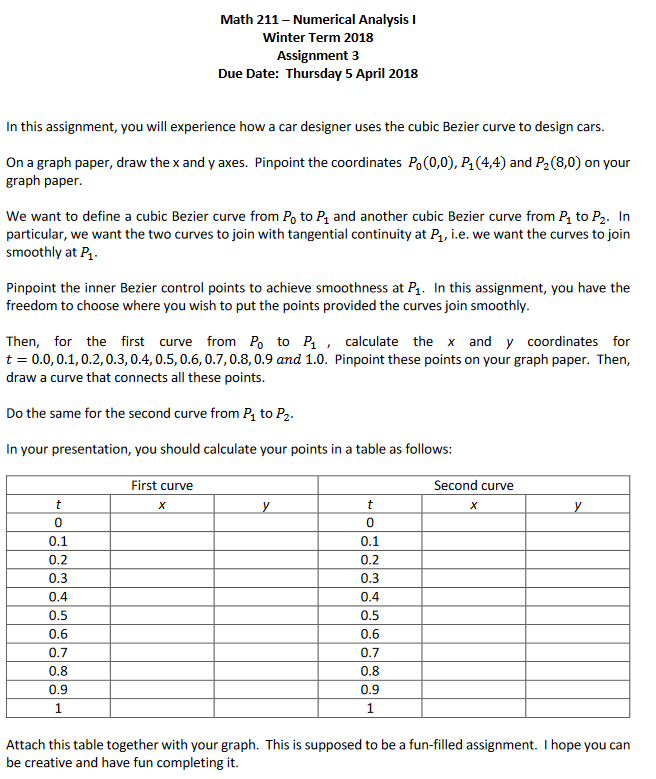

In [35]:
from IPython.display import Image
Image('./assignment_picture.png')

# The graph is made as follows:

## Functions used for calculating the bezier curve points, drawing the graph, etc.:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cubic_bezier_func(P,t):
    '''Calculates the value of a cubic bezier curve
       with points P=[p0, p1, p2, p3] at time t.
    
    ARGS:
        P->np.ndarray of shape (4,2). an array of (x->float,y->float) coordinate points, e.g.
            [[x0, y0], [x1, y1], [x2, y2], [x3, y3]]
        t->float time value for the bezier function.
    RETURNS:
        P = (float, float) tuple of (Px, Py) coordinates at the specific point in time using the bezier cuve function.
    REFERENCES: 
        https://math.stackexchange.com/questions/26846/is-there-an-explicit-form-for-cubic-b%C3%A9zier-curves
    '''
    if t < 0. or t > 1.:
        raise ValueError('t is {t}. use a value for t value satisfying 0<=t<=1.')
    B = ((1-t)**3)*P[0] +  3*((1-t)**2)*t*P[1] + 3*(1-t)*(t**2)*P[2] + (t**3)*P[3]
    return B  

def get_cubic_bezier(P, num_steps=100):
    '''This was used for trying the actual bezier curve line.
    I am esentially doing the same thing as the assignments calculation of x,y pairs for each t,
    but on a much larger scale so that I get enough points to draw a line that looks smooth with my line plotting function.
    '''
    if num_steps < 0:
        raise ValueError(f'num_steps is negative and should be a positive value. num_steps={num_steps}')
    B = [cubic_bezier_func(P, t) for t in np.linspace(start=0.0, stop=1.0, num=num_steps)]
    B_x, B_y = zip(*B) 
    return B_x, B_y
 

'''def cubic_bezier(P, t_range):
 
    #Gives the set of interpolated values of curve for t = [0,0+t_step] the bezier curve values for a Point with
    B = lambda P: 
    P_x, P_y = zip(*P)
    # Call the bezier curve function to get the values for x and y
    B_x = B(P_x)
    B_y = B(P_y)
    return (B_x, B_y)
'''


##########################################
#PLOTTING FUNCTIONS FOR CREATING GRAPHICS#
##########################################

def annotate_points(ax, X, Y, x_pad=0.1, y_pad=0.1):
    coords = [f'({x},{y})' for (x,y) in zip(X,Y)]
    for (i, txt) in enumerate(coords):
        #print(txt)
        ax.annotate(txt, (X[i]+x_pad, Y[i]+y_pad))
        
def plot_points(ax, P, label="", color='r', marker='x', size=2):
    P_x, P_y = zip(*P)
    #print(P_x)
    #print(P_y)
    ax.scatter(P_x, P_y, label=label,c=color, marker=marker, s=size)
    #annotate_points(ax, P_x, P_y)
    
def plot_bezier(ax, P, label='', color='blue', num_steps=100):
    B_x, B_y = get_cubic_bezier(P, num_steps)
    ax.plot(B_x, B_y, label=label, c=color)

## Making the graph: 

## The plot of the joined bezier curves 
A few notes on how what you see:

* P0, P1, P2, pinpointed/annotated,  
* Inner control points for each curve are labeled and annotated,  
* the t=0.0, 0.1, ..., 1.0 values were plotted and marked as 'x',   
* I drew a dashed line connecting the control points for each curve - just for a nice visual look!  
* I used different colours for each curve, to make the curves distinct from eachother -- although you can see how they smoothly join.
* For a smooth looking curve through the points, I got a set of points with a much larger resolution e.g. not just 10 values for t - as the more points used, the smoother the line will get. Then, I plotted a line based on those points.

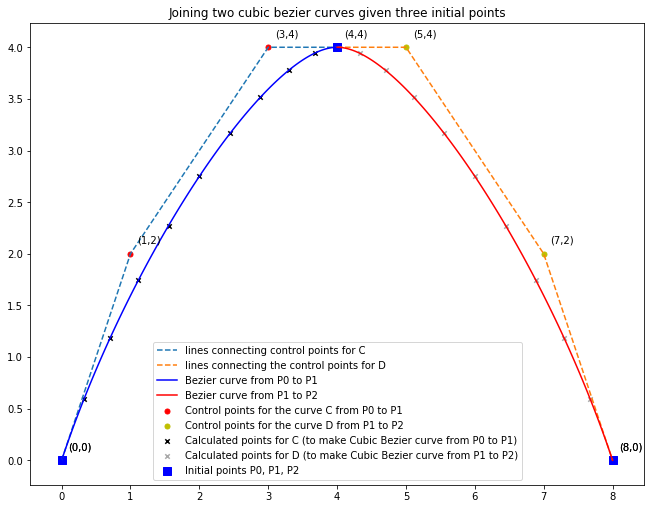

In [8]:
'''
Some notes:

Defining two bezier curves: a cubic bezier curve from P0 to P1,  and another from P1 to P2. 
We want tangential continuity at P1, therefore, three of our control points in our two curves must be collinear: 
The second last of our first curve, 
the last/first of our first/last curve (they are the same), 
and the second of our first curve.

Let's call the two bezier curves C and D, where C is the curve from P0->P1 and D is the curve from P1->P2.
C = {r0, r1, r2, r3} and D = {s0, s1, s2, s3}, where r0 = P0, r3=P1=s0, and s3=P2.

The inner bezier control points for the C curve are r1 and r2, 
and the inner control points for the D curve are s1, s2.
'''

#Initial Points
P0, P1, P2 = [(0,0), (4,4), (8,0)]
'''The 2nd and 3rd indices in each of the following lists are the coordinates for the inner points I decided to use.
I chose them such that the curves, joined together, will be smooth as required in the assignment. '''

# Control points
C = np.array([P0, (1,2), (3,4), P1])
D = np.array([P1, (5,4), (7,2), P2])

##########################
# Calculated X, Y points:#
##########################

# Curve from P0 to P1: Calculated x,y points using the cubic bezier function with initial control points C, and
# Curve from P1 to P2: Calculated x,y points using the cubic bezier function with initial control points D
C_curve = [cubic_bezier_func(C,t) for t in [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]
D_curve = [cubic_bezier_func(D,t) for t in [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]

# Used for annotating points on the plot
Cx, Cy = zip(*C)
Dx, Dy = zip(*D)

f, ax =  plt.subplots(figsize=(11,8.5))

plot_points(ax, C, label="Control points for the curve C from P0 to P1", color='r', marker='o', size=25)
plot_points(ax, D, label="Control points for the curve D from P1 to P2", color='y', marker='o', size=25)

plot_points(ax, C_curve, label="Calculated points for C (to make Cubic Bezier curve from P0 to P1)", color='black', size=20)
plot_points(ax, D_curve, label="Calculated points for D (to make Cubic Bezier curve from P1 to P2)", color='darkgray', size=20)

ax.plot([c[0] for c in C], [c[1] for c in C], linestyle='dashed', label='lines connecting control points for C')
ax.plot([d[0] for d in D], [d[1] for d in D],linestyle='dashed', label='lines connecting the control points for D')

plot_points(ax, [P0, P1, P2], label="Initial points P0, P1, P2", color='b',marker='s', size=50)


plot_bezier(ax, C, color='b', label='Bezier curve from P0 to P1')
plot_bezier(ax, D, color='r', label='Bezier curve from P1 to P2')

#Annotating points
annotate_points(ax, [0,4,8], [0,4,0])
annotate_points(ax, Cx[:-1], Cy[:-1])
annotate_points(ax, Dx[1:], Dy[1:])

ax.set_title("Joining two cubic bezier curves given three initial points")

ax.legend()



##  Writing / Table of values for each curve

In [18]:
print(f'Inner control points for the first curve: (1,2) and (3,4).')
print(f'Inner control points for the second curve:(5,4) and (7,2)')

T = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# FIrst curve x y points
Cxx, Cyy = zip(*C_curve)
# Second curve x y points
Dxx, Dyy = zip(*D_curve)

print(f'''
First Curve\t\t|\tSecond Curve
------------------------------------------------------------
t\tx\ty\t|\tt\tx\ty\t
------------------------------------------------------------
''')
for i, (t, Cx, Cy, Dx, Dy) in enumerate(zip(T, Cxx, Cyy, Dxx, Dyy)):
    print(f'{t}\t{np.round(Cx, 2)}\t{np.round(Cy, 2)}\t|\t{t}\t{np.round(Dx, 2)}\t{np.round(Dy, 2)}')
    


Inner control points for the first curve: (1,2) and (3,4).
Inner control points for the second curve:(5,4) and (7,2)

First Curve		|	Second Curve
------------------------------------------------------------
t	x	y	|	t	x	y	
------------------------------------------------------------

0.0	0.0	0.0	|	0.0	4.0	4.0
0.1	0.33	0.6	|	0.1	4.33	3.94
0.2	0.7	1.18	|	0.2	4.7	3.78
0.3	1.12	1.75	|	0.3	5.12	3.51
0.4	1.55	2.27	|	0.4	5.55	3.17
0.5	2.0	2.75	|	0.5	6.0	2.75
0.6	2.45	3.17	|	0.6	6.45	2.27
0.7	2.88	3.51	|	0.7	6.88	1.75
0.8	3.3	3.78	|	0.8	7.3	1.18
0.9	3.67	3.94	|	0.9	7.67	0.6
1.0	4.0	4.0	|	1.0	8.0	0.0


###  Note - 

The actual values for the curves x, y, in the above graph have been rounded. I'll print the full values in the following cell, so you can see the more precise interpolated points!


In [20]:
print('x values for first curve:',Cxx)
print('y values for first curve:', Cyy)
print('x values for first curve:',Dxx)
print('y values for first curve:', Dyy)

x values for first curve: (0.0, 0.32800000000000007, 0.70400000000000018, 1.1159999999999997, 1.5520000000000003, 2.0, 2.4480000000000004, 2.8839999999999995, 3.2960000000000003, 3.6720000000000002, 4.0)
y values for first curve: (0.0, 0.59800000000000009, 1.1840000000000004, 1.7459999999999996, 2.2720000000000002, 2.75, 3.1680000000000001, 3.5139999999999993, 3.7760000000000007, 3.9420000000000002, 4.0)
x values for first curve: (4.0, 4.3280000000000003, 4.7040000000000006, 5.1159999999999988, 5.5520000000000005, 6.0, 6.4480000000000004, 6.8840000000000003, 7.2960000000000012, 7.6720000000000006, 8.0)
y values for first curve: (4.0, 3.9420000000000002, 3.7760000000000011, 3.5139999999999993, 3.1680000000000001, 2.75, 2.2720000000000002, 1.7460000000000002, 1.1839999999999997, 0.59799999999999986, 0.0)


## Final note -

I asked the professor if the above was OK to hand in (since it is not handwritten on paper), and he said it was ok - - as you can see, I have still filled the table with values, and made the graph, etc.

I hope you enjoy!

#### unnecessary, but some fun:

In [32]:
def general_joined_bezier_plot(P0=(0,0), P1=(4,4), P2=(8,0), C_inner=[(1,1), (2,2)], D_inner=[(5,5), (7,4)]):
    '''The 2nd and 3rd indices in each of the following lists are the coordinates for the inner points I decided to use.
    I chose them such that the curves, joined together, will be smooth as required in the assignment. '''
    # Control points
    C = np.array([P0, C_inner[0], C_inner[1], P1])
    D = np.array([P1, D_inner[0], D_inner[1], P2])



    ##########################
    # Calculated X, Y points:#
    ##########################

    # Curve from P0 to P1: Calculated x,y points using the cubic bezier function with initial control points C, and
    # Curve from P1 to P2: Calculated x,y points using the cubic bezier function with initial control points D
    C_curve = [cubic_bezier_func(C,t) for t in [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]
    D_curve = [cubic_bezier_func(D,t) for t in [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]

    # Used for annotating points on the plot
    Cx, Cy = zip(*C)
    Dx, Dy = zip(*D)

    f, ax =  plt.subplots(figsize=(11,8.5))

    plot_points(ax, C, label="Control points for the curve C from P0 to P1", color='r', marker='o', size=25)
    plot_points(ax, D, label="Control points for the curve D from P1 to P2", color='y', marker='o', size=25)

    plot_points(ax, C_curve, label="Calculated points for C (to make Cubic Bezier curve from P0 to P1)", color='black', size=20)
    plot_points(ax, D_curve, label="Calculated points for D (to make Cubic Bezier curve from P1 to P2)", color='darkgray', size=20)

    ax.plot([c[0] for c in C], [c[1] for c in C], linestyle='dashed', label='lines connecting control points for C')
    ax.plot([d[0] for d in D], [d[1] for d in D],linestyle='dashed', label='lines connecting the control points for D')

    plot_points(ax, [P0, P1, P2], label="Initial points P0, P1, P2", color='b',marker='s', size=50)


    plot_bezier(ax, C, color='b', label='Bezier curve from P0 to P1')
    plot_bezier(ax, D, color='r', label='Bezier curve from P1 to P2')

    #Annotating points
    annotate_points(ax, [0,4,8], [0,4,0])
    annotate_points(ax, Cx[:-1], Cy[:-1])
    annotate_points(ax, Dx[1:], Dy[1:])

    ax.set_title("Joining two cubic bezier curves given three initial points")

    ax.legend()

    

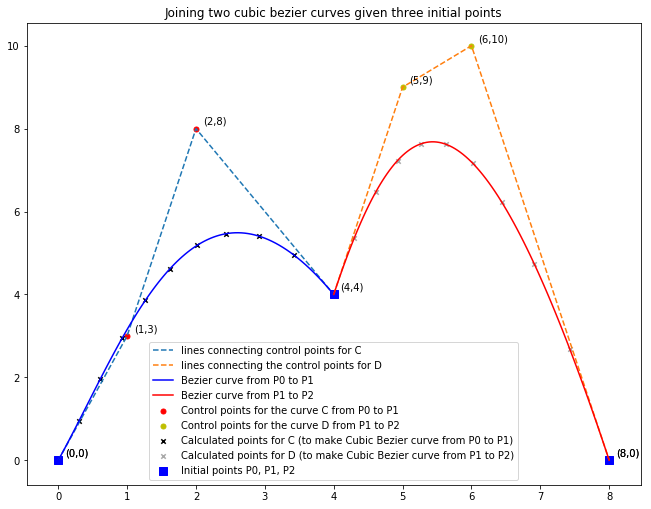

In [34]:
general_joined_bezier_plot(P0=(0,0), P1=(4,4), P2=(8,0), C_inner=[(1,3), (2,8)], D_inner=[(5,9), (6,10)])
